These experiments were run using two files.

Firstly `continuous.sh` and `train.py`.

Each instance of `train.py` ran a algorithm in a envinronment one time.

To get 10 seeds per environment with 9 envrionments and 3 algorithms there are a total of 270 runs that need to be done.

The 270 runs were completed across two job submissions 1-90 and 91-270.

In [3]:
import os
import numpy as np
import pandas as pd

# Getting the results

A slight error in the `train.py` code meant that a large chunk of the results had the labels ppo and sac switched, which resulted in the first attempt at the experiments to fail. The result is that the results are split into three different directories from three different grid jobs. Each grid output directory will ony be used to get a single model type from.

In [ ]:
results_dirs = [f'/home/thompsjame1/grid-output/467649{n}_rl_continuous_control_baseline_experiments' for n in [0,2]]
results_dirs.append('/home/thompsjame1/grid-output/4676867_rl_continuous_control_baseline_experiments')
results_dirs.append('/home/thompsjame1/grid-directory/output/4677434_tqc_baseline')
results_algo = ['td3', 'ppo', 'sac']
results_dirs = [os.path.join(d, "training_evaluations") for d in results_dirs]
results_dirs

['/home/thompsjame1/grid-output/4676490_rl_continuous_control_baseline_experiments/training_evaluations',
 '/home/thompsjame1/grid-output/4676492_rl_continuous_control_baseline_experiments/training_evaluations',
 '/home/thompsjame1/grid-output/4676867_rl_continuous_control_baseline_experiments/training_evaluations',
 '/home/thompsjame1/grid-directory/output/4677434_tqc_baseline/training_evaluations']

In [11]:
results_path = [
    os.path.join(results_dir, result_path)
    for results_dir, algo_type in zip(results_dirs, results_algo)
    for result_path in os.listdir(results_dir)
    if result_path.startswith(algo_type)
]

len(results_path), results_path[2:5]

FileNotFoundError: [Errno 2] No such file or directory: '/home/thompsjame1/grid-output/4676492_rl_continuous_control_baseline_experiments/training_evaluations'

In [4]:
results = []
for path in results_path:
    if not path.endswith('.npz'):
        continue

    eval_name = path.split('/')[-1]

    model = eval_name.split('_')[0]
    env = eval_name.split('_')[1]
    steps = eval_name.split('_')[2]
    seed = eval_name.split('_')[3].split('.')[0]
    npz = np.load(path)

    results.append({
        'model': model,
        'env': env,
        'total_steps': steps,
        'seed': seed,
        'timesteps': npz['timesteps'],
        'rewards': npz['results'],
        'ep_lengths': npz['ep_lengths'],
    })

df = pd.DataFrame(results)
df

,model,env,total_steps,seed,timesteps,rewards,ep_lengths
0,td3,HalfCheetah-v5,1000000,0,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[[-2.47477, -1.326504, -0.692302, -1.338596, -...","[[1000, 1000, 1000, 1000, 1000, 1000, 1000, 10..."
1,td3,HalfCheetah-v5,1000000,1,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[[-3.266775, -2.67324, -1.939755, -2.038325, -...","[[1000, 1000, 1000, 1000, 1000, 1000, 1000, 10..."
2,td3,HalfCheetah-v5,1000000,2,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[[0.468081, -2.293828, -1.879588, -0.693806, -...","[[1000, 1000, 1000, 1000, 1000, 1000, 1000, 10..."
3,td3,HalfCheetah-v5,1000000,3,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[[-1.491101, -2.19, -1.539083, -1.609354, -1.1...","[[1000, 1000, 1000, 1000, 1000, 1000, 1000, 10..."
4,td3,HalfCheetah-v5,1000000,4,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[[-2.98534, -2.277705, 0.022336, -1.132101, -2...","[[1000, 1000, 1000, 1000, 1000, 1000, 1000, 10..."
...,...,...,...,...,...,...,...
265,sac,Pusher-v5,1000000,5,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[[-47.668813, -55.833692, -67.94624, -51.25912...","[[100, 100, 100, 100, 100, 100, 100, 100, 100,..."
266,sac,Pusher-v5,1000000,6,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[[-54.627242, -68.915077, -55.155968, -57.6722...","[[100, 100, 100, 100, 100, 100, 100, 100, 100,..."
267,sac,Pusher-v5,1000000,7,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[[-54.29353, -57.748468, -53.698268, -57.73841...","[[100, 100, 100, 100, 100, 100, 100, 100, 100,..."
268,sac,Pusher-v5,1000000,8,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[[-54.836784, -52.815107, -59.760734, -58.6271...","[[100, 100, 100, 100, 100, 100, 100, 100, 100,..."


# Validating the results

I would like to validate two things abotu the results.

1. That the model types are actually waht they say they are.
2. That the correct number of runs and seeds have been run

## Validating model type

## Checking correct number of runs

# Visualizing the results

In [5]:
df_grouped = df.explode(['timesteps', 'rewards']).groupby(['model', 'env', 'timesteps']).agg({
    "rewards": lambda x: np.vstack(x),
}).reset_index()
df_grouped

,model,env,timesteps,rewards
0,ppo,Ant-v5,1000,"[[994.605428, 994.789186, 994.98996, 990.99214..."
1,ppo,Ant-v5,2000,"[[997.7473, 984.486736, 995.396178, 995.329621..."
2,ppo,Ant-v5,3000,"[[991.231405, 989.554447, 986.973473, 987.5504..."
3,ppo,Ant-v5,4000,"[[989.156628, 985.691269, 982.338319, 987.3692..."
4,ppo,Ant-v5,5000,"[[978.897593, 979.452877, 989.408207, 987.4948..."
...,...,...,...,...
27004,td3,Walker2d-v5,996000,"[[3586.390619, 3328.577188, 3469.250313, 3408...."
27005,td3,Walker2d-v5,997000,"[[3077.539078, 3103.373637, 3082.026325, 3024...."
27006,td3,Walker2d-v5,998000,"[[3202.509432, 3237.036607, 3191.531424, 3249...."
27007,td3,Walker2d-v5,999000,"[[3358.502255, 3330.063387, 3323.810543, 3330...."


In [ ]:
df_grouped.loc[0, 'rewards']

(10, 10)

In [23]:
df_grouped["mean_rewards"] = df_grouped["rewards"].apply(lambda x: np.mean(x))
df_grouped["max_rewards"] = df_grouped["rewards"].apply(lambda x: np.max(x))
df_grouped["min_rewards"] = df_grouped["rewards"].apply(lambda x: np.min(x))
ci = 0.667
df_grouped['upper_ci'] = df_grouped['rewards'].apply(lambda x: np.percentile(x, 100 - ci))
df_grouped['lower_ci'] = df_grouped['rewards'].apply(lambda x: np.percentile(x, ci))
df_grouped

,model,env,timesteps,rewards,mean_rewards,max_rewards,min_rewards,upper_ci,lower_ci
0,ppo,Ant-v5,1000,"[[994.605428, 994.789186, 994.98996, 990.99214...",993.814065,1004.952310,985.528747,1004.240742,985.542997
1,ppo,Ant-v5,2000,"[[997.7473, 984.486736, 995.396178, 995.329621...",994.207132,1003.606960,984.486736,1003.180563,985.443186
2,ppo,Ant-v5,3000,"[[991.231405, 989.554447, 986.973473, 987.5504...",987.942770,1006.239413,965.776645,1004.377395,970.605963
3,ppo,Ant-v5,4000,"[[989.156628, 985.691269, 982.338319, 987.3692...",988.130807,1004.213439,958.616273,1003.860654,966.381570
4,ppo,Ant-v5,5000,"[[978.897593, 979.452877, 989.408207, 987.4948...",984.505891,1014.399710,964.516934,1012.274668,965.521759
...,...,...,...,...,...,...,...,...,...
27004,td3,Walker2d-v5,996000,"[[3586.390619, 3328.577188, 3469.250313, 3408....",3750.588397,4787.474235,888.866982,4784.117228,1948.778867
27005,td3,Walker2d-v5,997000,"[[3077.539078, 3103.373637, 3082.026325, 3024....",3674.283195,4833.346584,2126.675978,4829.793751,2367.918549
27006,td3,Walker2d-v5,998000,"[[3202.509432, 3237.036607, 3191.531424, 3249....",3473.941411,4904.334854,1696.109651,4871.448469,1865.637848
27007,td3,Walker2d-v5,999000,"[[3358.502255, 3330.063387, 3323.810543, 3330....",3744.905717,4885.951055,1829.380533,4882.143061,1995.701982


In [10]:
models = df['model'].unique()
envs = df['env'].unique()
seeds = df['seed'].unique()

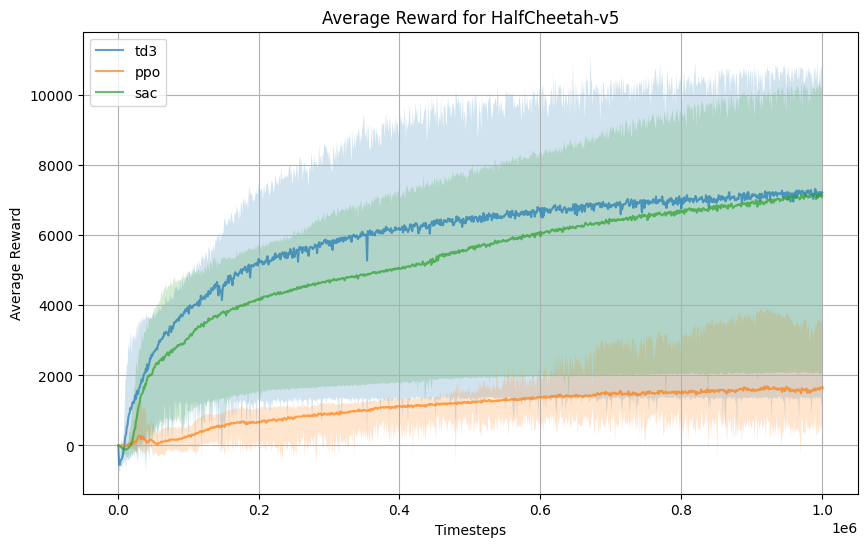

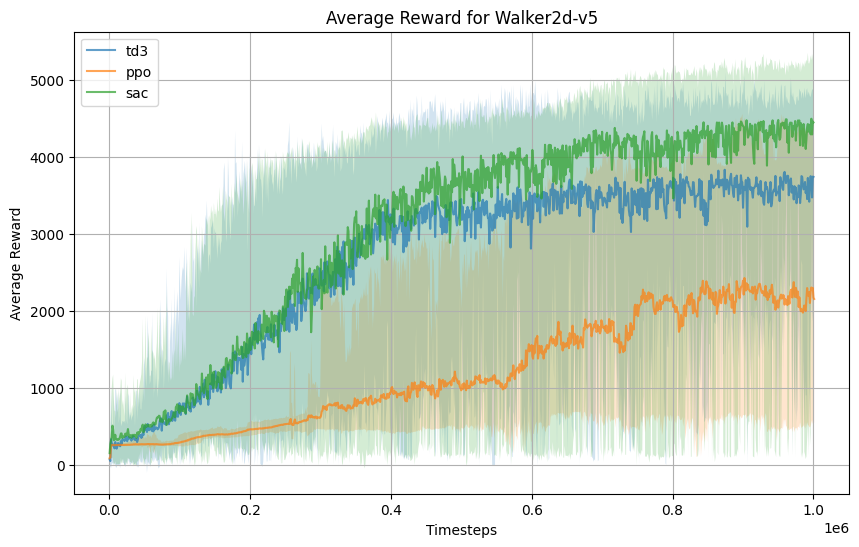

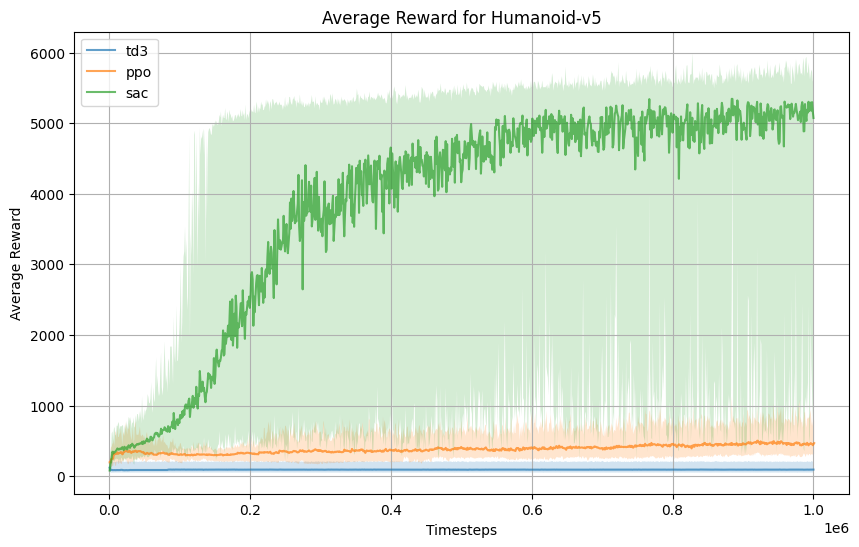

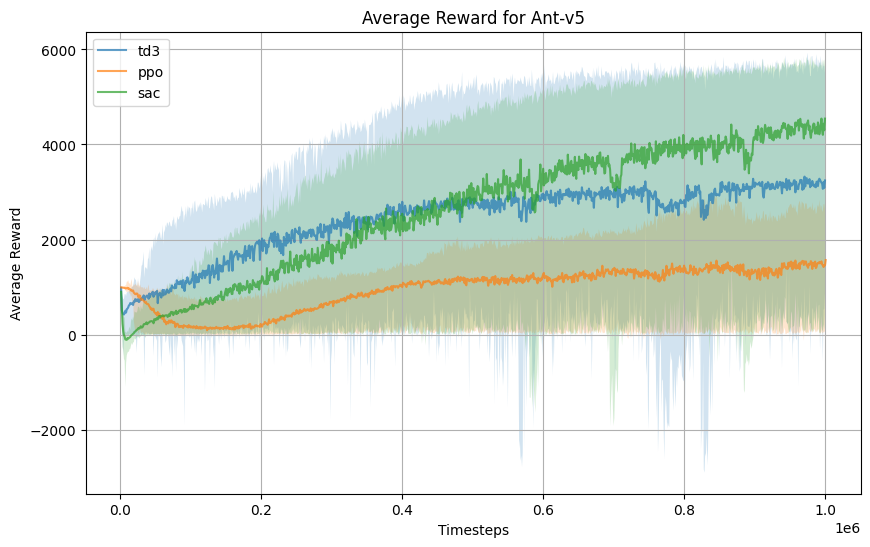

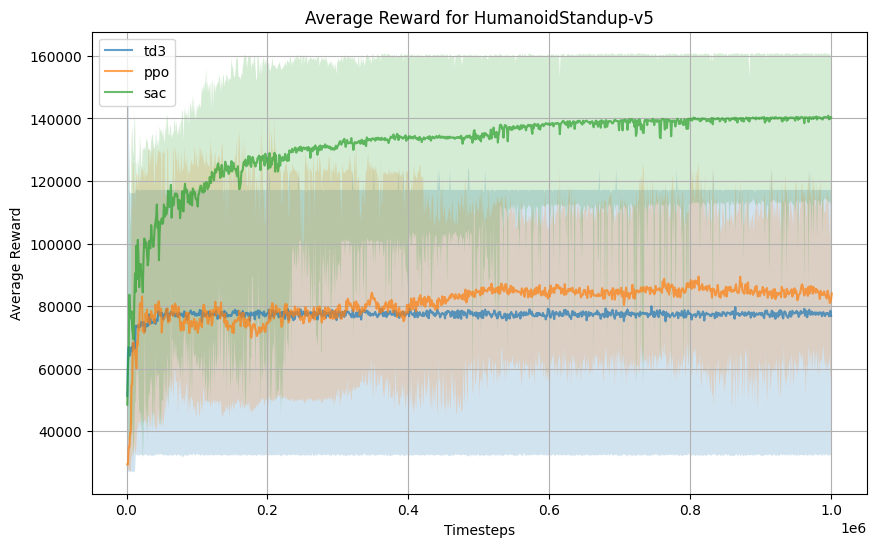

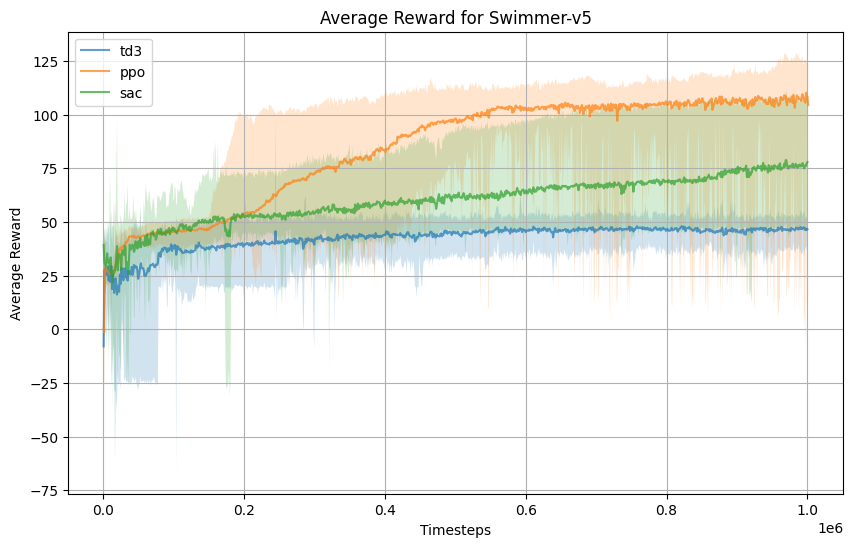

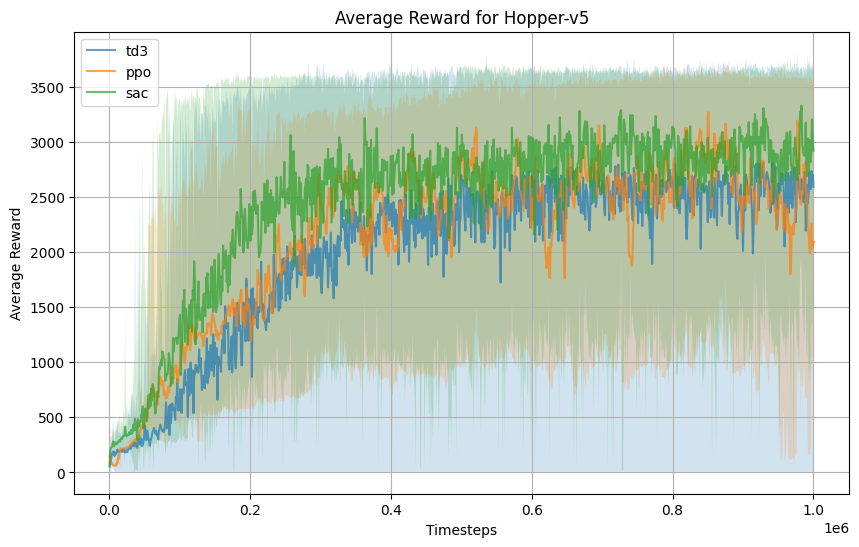

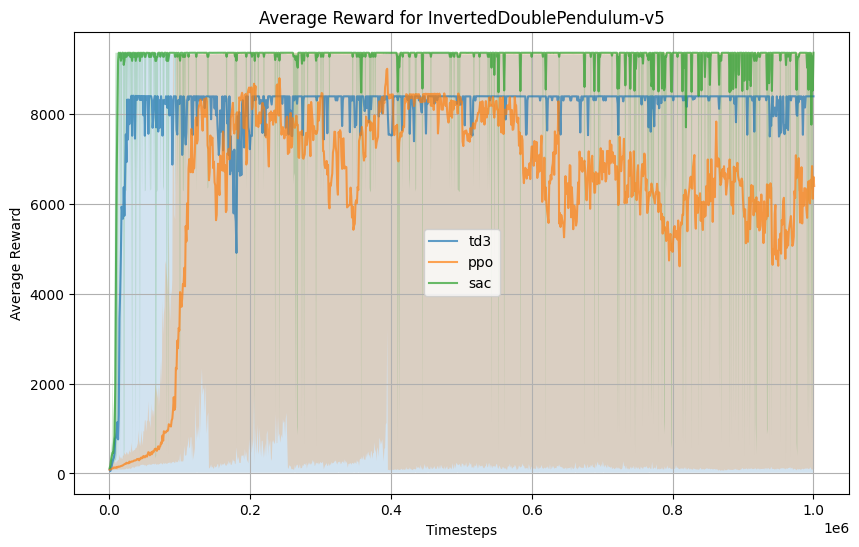

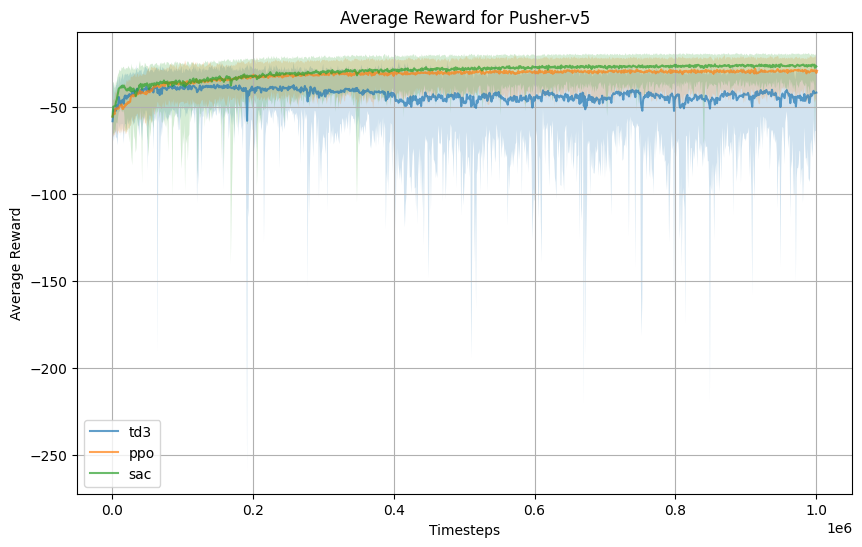

In [24]:
import matplotlib.pyplot as plt

for env in envs:
    plt.figure(figsize=(10, 6))
    for model in models:
        df_plot = df_grouped[(df_grouped['model'] == model) & (df_grouped['env'] == env)]
        if df_plot.empty:
            continue
        
        # Plot the mean rewards as a line
        plt.plot(df_plot['timesteps'], df_plot['mean_rewards'], label=model, alpha=0.7)
        
        # Fill between the min and max rewards to create the shaded area
        plt.fill_between(
            df_plot['timesteps'],
            df_plot["upper_ci"],
            df_plot["lower_ci"],
            alpha=0.2
        )
    
    plt.title(f'Average Reward for {env}')
    plt.xlabel('Timesteps')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.grid(True)
    plt.show()

In [35]:
PEG = {
    "td3": {
        "hopper": 3200,
        "swimmer": 57,
        "walker2d": 3700,
        "humanoid": 200,
        "ant": 4300,
        "humanoidstandup": 82000
    },
    "sac": {
        "hopper": 3200,
        "swimmer": 42,
        "walker2d": 4500,
        "humanoid": 5200,
        "ant": 5200,
        "humanoidstandup": 140000
    }
}

mine = {
    "td3": {
        "halfcheetah": 7000,
        "walker2d": 3500,
        "humanoid": 200,
        "ant": 3000,
        "humanoidstandup": 80000,
        "swimmer": 48,
        "hopper": 2600,
        "inverteddoublependulum": 8200,
        "pusher": -50
    },
    "sac": {
        "halfcheetah": 7000,
        "walker2d": 4500,
        "humanoid": 5000,
        "ant": 4200,
        "humanoidstandup": 140000,
        "swimmer": 80,
        "hopper": 3000,
        "inverteddoublependulum": 8200,
        "pusher": -30
    },
    "ppo": {
        "halfcheetah": 1800,
        "walker2d": 2100,
        "humanoid": 500,
        "ant": 1800,
        "humanoidstandup": 82500,
        "swimmer": 110,
        "hopper": 2500,
        "inverteddoublependulum": 600,
        "pusher": -30
    }
}



In [37]:
percentage_threshold = 10  # Adjust this value as needed (e.g., 20% difference)
def compare_results_with_percentage(other, mine, percentage_threshold):
    significant_differences = {}
    
    for algo in other:
        if algo in mine:
            for env, peg_value in other[algo].items():
                if env in mine[algo]:
                    mine_value = mine[algo][env]
                    if peg_value != 0:  # Avoid division by zero
                        percentage_diff = (peg_value - mine_value) / abs(peg_value) * 100
                        if percentage_diff > percentage_threshold:
                            if algo not in significant_differences:
                                significant_differences[algo] = {}
                            significant_differences[algo][env] = {
                                "PEG": peg_value,
                                "mine": mine_value,
                                "percentage_difference": percentage_diff
                            }
    return significant_differences

# Compare PEG and mine
significant_differences = compare_results_with_percentage(PEG, mine, percentage_threshold)

# Print the results
for algo, envs in significant_differences.items():
    print(f"Algorithm: {algo}")
    for env, values in envs.items():
        print(f"  Environment: {env}")
        print(f"    PEG paper Value: {values['PEG']}")
        print(f"    My hyperparameter Value: {values['mine']}")
        print(f"    Percentage Difference: {values['percentage_difference']:.2f}%")

Algorithm: td3
  Environment: hopper
    PEG paper Value: 3200
    My hyperparameter Value: 2600
    Percentage Difference: 18.75%
  Environment: swimmer
    PEG paper Value: 57
    My hyperparameter Value: 48
    Percentage Difference: 15.79%
  Environment: ant
    PEG paper Value: 4300
    My hyperparameter Value: 3000
    Percentage Difference: 30.23%
Algorithm: sac
  Environment: ant
    PEG paper Value: 5200
    My hyperparameter Value: 4200
    Percentage Difference: 19.23%
